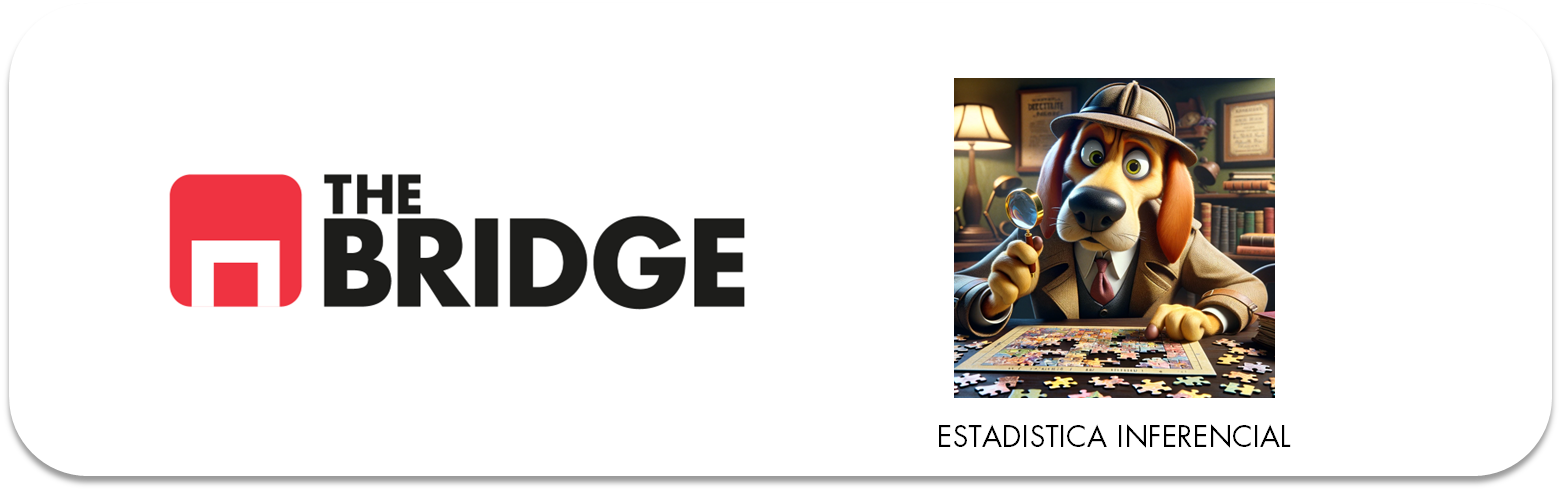

## INFERENCIAL (V): Frecuencias Muestrales

Como hasta ahora antes de empezar, carguemos nuestras librerías y los datasets que nos sirven de ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_titanic = pd.read_csv("./data/titanic.csv")

# Obtengamos ya las muestras suponiendo los datos anteriores como las "poblaciones"

num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")


### Z-test para proporciones y frecuencias

Es hora de trabajar sobre las medidas que tomamos en las variables categóricas, es decir sobre sus frecuencias y poder hacer suposiciones y testar hipótesis sobre las frecuencias de esas mismas variables para la población total de la que hemos obtenido nuestra muestra.

### Test para un valor concreto de frecuencia o proporción

Usemos un ejemplo para ver el Z-test aplicado a una frecuencia. En concreto, supongamos que queremos saber si dada la tasa de supervivencia de nuestra muestra:

In [ ]:
tasa_supervivencia_muestral = round(muestra_titanic["alive"].value_counts(normalize = True)["yes"] * 100,2)
tasa_supervivencia_muestral

podemos rechazar una tasa un poco menor, digamos un 37%, con una significación del 95% (probabilidad de no equivocarnos al rechazar la hipótesis nula). En términos de hipótesis:

$$H_0: \pi = 37\,\% \; \text{(La hipótesis nula es la contraria a lo que estamos queriendo reforzar)}$$

$$H_a: \pi \neq 37\,\%$$

Para aplicar el test recurrimos a otro paquete, esta vez `statsmodels`:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.37     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi)

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")


El p-valor obtenido no nos permite rechazar la hipótesis nula, por lo que la tasa de supervivencia en la población para una confianza del 95% podría ser 37. Probemos un valor aún menor, 32% (y sí así podríamos encontrar el equivalente al IC para esta tasa)

In [ ]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.32   # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi)

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")


Para ese p-value sí que podríamos rechazar la hipótesis nula y decir que la tasa de supervivencia en la "población" del titanic es superior a 32%, con una confianza del 95%

### Test para umbrales de una proporción

Al igual que ocurría con el caso de testar si la media de una población sería mayor o menor que un umbral, podemos aplicar el test Z para estimar la significación estadística de hipótesis análogas sobre proporciones o frecuencias

Por ejemplo, supongamos que nuestra hipótesis es que la tasa de supervivencia es menor que 40%, cómo serían nuestras hipótesis nula y alternativa:

$$H_0: \pi \ge 40\,\%$$
$$H_a: \pi < 40\,\%$$

Y nuestro test:

In [ ]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.40     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi, alternative = "smaller")

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")

No podemos rechazar la hipótesis nula y por tanto no podemos asumir que la tasa de supervivencia en la población sea menor al 40%, con un 95% de confianza estadística.


Probemos ahora para la hipótesis de que la tasa debe ser mayor que un 30%:

$$H_0: \pi \leq 30\,\%$$
$$H_a: \pi > 30\,\%$$

In [ ]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.30     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi, alternative = "larger") # Fijate que los valores alternative son diferentes a los usados t-test

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")

El p-value obtenido nos lleva a rechazar la hipótesis nula y por tanto podemos decir con una confianza estadística del 95% que la tasa de supervivencia en la población es mayor al 30%.

### Z-Test para comprobar proporciones y ratios en dos poblaciones

Igual que en la sesión anterior comparamos dos muestras de llamadas de dos callcenter diferentes para poder decir si la media de la duración de llamadas era diferetne, podemos hacer lo mismo respecto a la frecuencia o ratio o proporción de una variable categórica medida en dos muestras distintas.

Por ejemplo: 
- Efectividad de medicamentos (proporción de personas que han mejorado tras un tratamiento con dos medicamentos distintos o un medicamento y un placebo)
- Resultados electorales (proporción de personas que votan a cada candidato)
- Comportamiento de consumidores (proporción de consumidores que compran un producto)
- Resultados de encuestas (proporción de personas que responden en dos regiones diferentes)
- **A/B testing**: En estudios de mercado, se implementan dos versiones de un producto (A y B) y se prueban en diferentes grupos de usuarios


Veamos un ejemplo del A/B testing:

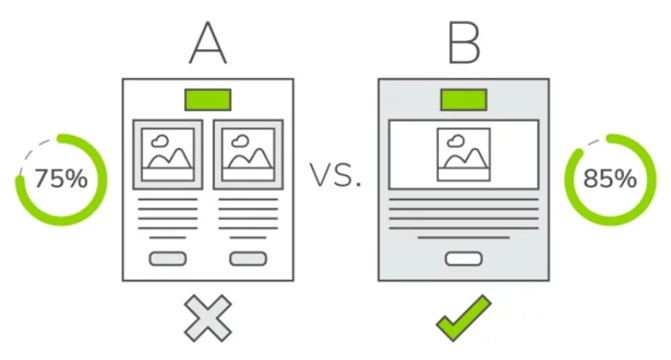

**Ejemplo**: Para conseguir registros en nuestra web, creamos dos secciones de registro diferentes (una más colorida, y otra más sobria). 

El primer diseño se muestra a 200 personas, de las cuales conseguimos 130 registros (65% de conversiones)  
El segundo diseño se muestra a 100 personas, de las cuales conseguimos 56 registros (56% de conversiones)

¿Es esta diferencia estadísticamente significativa? ¿Qué opción escojo?

1. Definimos las hipótesis, en nuestro caso la alternativa es que la primera tiene un ratio de conversión mayor que la segunda:  
$$H_0: p_1=p_2$$  
$$H_1: p_1>p_2$$

2. Calculamos el estadístico (fíjate en cómo introducimos las dos proporciones):

In [ ]:

exitos = np.array([130,56])
muestras = np.array([200,100])


(z,pvalor) = proportions_ztest(count=exitos, nobs=muestras, alternative='larger')

print(z)
print(pvalor)

No podemos rechazar la hipótesis nula con un 95% de confianza y por tanto, no podemos decir que una de las webs haya resultado mejor que la otra con ese nivel de confianza estadística (ojo fíjate que sí podríamos decirlo con un 90% de confianza)